## 2. Text Preprocessing

*Text preprocessing* adalah tahap awal dalam NLP yang bertujuan untuk membersihkan dan mempersiapkan data teks agar dapat diolah lebih efektif oleh model atau algoritma. Dengan melakukan *text preprocessing*, data teks menjadi lebih terstruktur, mudah diinterpretasi, dan siap digunakan untuk berbagai tugas seperti *text classification*.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk

#### ***Brief Exploration***

Saya melakukan *brief exploration* pada data untuk memahami dan mengeksplorasi data teks sebelum dilakukan pemrosesan lebih lanjut. Tujuan dari *brief exploration* adalah memahami sifat data secara sekilas untuk mendapatkan pemahaman awal, identifikasi masalah, dan penentuan langkah selanjutnya.

Saya melakukan pengecekan terkait kebutuhan pengolahan lebih lanjut terhadap data seperti mendeteksi missing value, duplicated data, imbalance data, dan memfilter data yang sekiranya dapat mengganggu proses analisis. Ini cukup berbeda dengan EDA yang merupakan pendekatan lebih mendalam terhadap eksplorasi data karena menurut saya yang harus difokuskan adalah untuk melakukan *text classification*, dimana tidak memerlukan EDA secara mendalam.

In [2]:
df = pd.read_csv('scraping-dataset.csv')
df

,text,media,label
0,--\n\nPink mengungkapkan dirinya mengidap infe...,CNN Indonesia,Entertainment
1,--\n\nColdplay bakal menjual Infinity Tickets ...,CNN Indonesia,Entertainment
2,--\n\nTaylor Swift akan resmi memulai leg inte...,CNN Indonesia,Entertainment
3,--\n\nPenyanyi asal Inggris Morrissey resmi me...,CNN Indonesia,Entertainment
4,--\n\nSejumlah penggemar Coldplay berhasil mem...,CNN Indonesia,Entertainment
...,...,...,...
590,RENNES - Jonatan Christie speechless alias sul...,Okezone,Sports
591,"MOMEN tak jujur pebulu tangkis Denmark, Kim As...",Okezone,Sports
592,JAKARTA - Yeremia Erich Yoche Yacob Rambitan m...,Okezone,Sports
593,HASIL French Open 2023 akan dibahas di sini. G...,Okezone,Sports


In [3]:
# check missing value
df.isnull().sum()

text     0
media    0
label    0
dtype: int64

Tidak ada missing value pada dataset.

In [4]:
# check duplicated data
print("Duplicated data:", df.duplicated().sum())
print("Duplicated text:", df['text'].duplicated().sum())

Duplicated data: 0
Duplicated text: 0


Tidak ada duplikasi pada data, baik secara keseluruhan maupun pada isi teks.

Media: ['CNN Indonesia' 'Detik' 'Liputan 6' 'Okezone' 'Alinea']
Labels: ['Entertainment' 'Politics' 'Sports']

Jumlah artikel dengan label 'Entertainment': 200
Jumlah artikel dengan label 'Politics': 195
Jumlah artikel dengan label 'Sports': 200





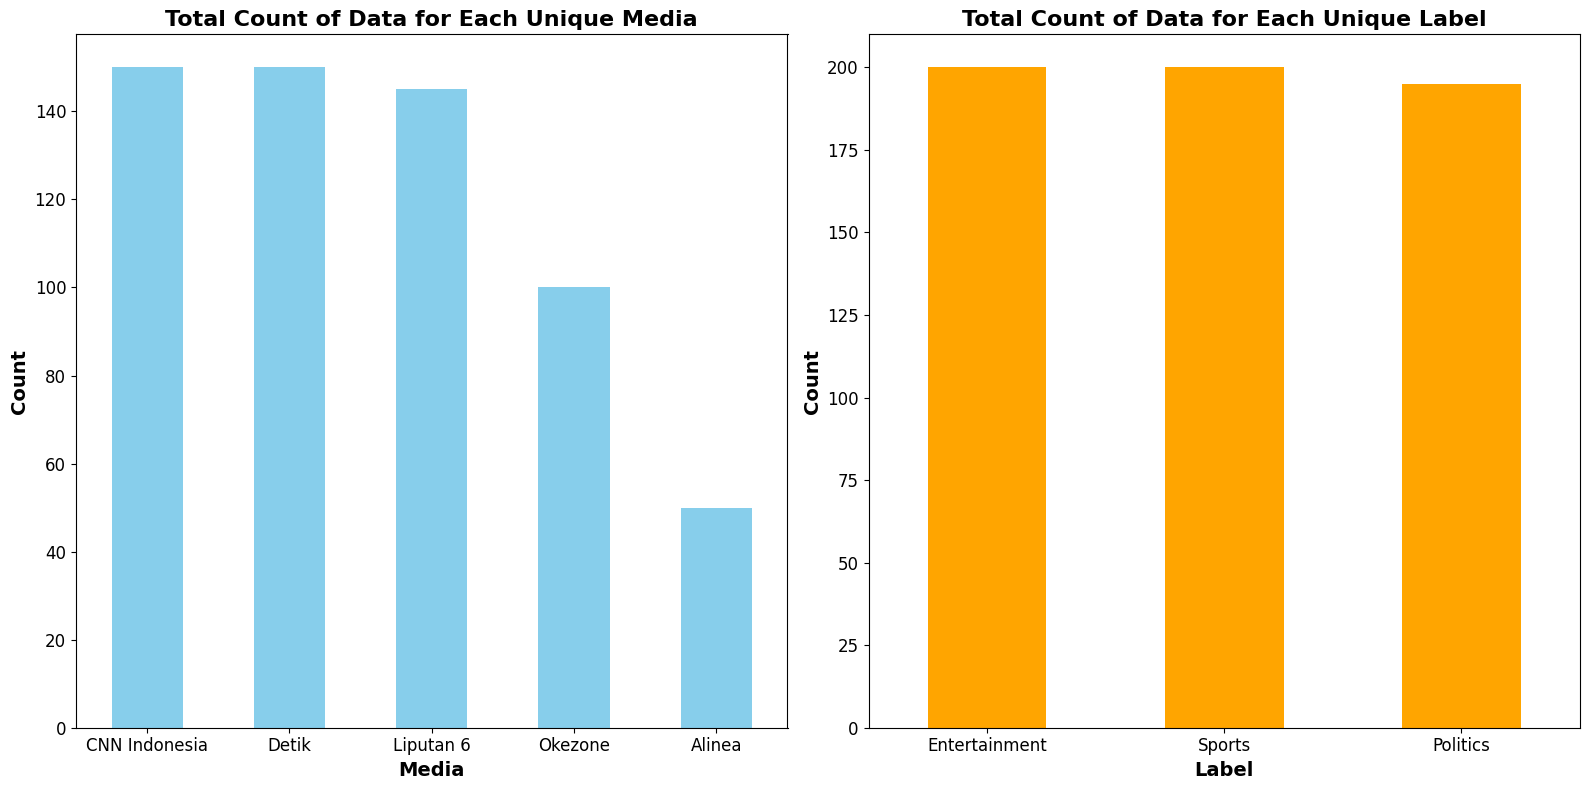

In [5]:
# check uniques
unique_media = df['media'].unique()
unique_labels = df['label'].unique()

entertainment_count = (df['label'] == 'Entertainment').sum()
politics_count = (df['label'] == 'Politics').sum()
sports_count = (df['label'] == 'Sports').sum()

print("Media:", unique_media)
print("Labels:", unique_labels)
print("")
print(f"Jumlah artikel dengan label 'Entertainment': {entertainment_count}")
print(f"Jumlah artikel dengan label 'Politics': {politics_count}")
print(f"Jumlah artikel dengan label 'Sports': {sports_count}")
print("\n\n")

# plotting
plt.figure(figsize=(16, 8))

# left y-axis
ax1 = plt.subplot(1, 2, 1)
media_counts = df['media'].value_counts()
media_counts.plot(kind='bar', color='skyblue', ax=ax1)

ax1.set_title('Total Count of Data for Each Unique Media', fontweight='bold', fontsize=16)
ax1.set_xlabel('Media', fontweight='bold', fontsize=14)
ax1.set_ylabel('Count', fontweight='bold', fontsize=14)
ax1.tick_params(axis='x', rotation=0, labelsize=12)
ax1.tick_params(axis='y', labelsize=12)

# right y-axis
ax2 = plt.subplot(1, 2, 2)
label_counts = df['label'].value_counts()
label_counts.plot(kind='bar', color='orange', ax=ax2)

ax2.set_title('Total Count of Data for Each Unique Label', fontweight='bold', fontsize=16)
ax2.set_xlabel('Label', fontweight='bold', fontsize=14)
ax2.set_ylabel('Count', fontweight='bold', fontsize=14)
ax2.tick_params(axis='x', rotation=0, labelsize=12)
ax2.tick_params(axis='y', labelsize=12)

plt.tight_layout()
plt.show()

Baik Media maupun Label sudah sesuai seperti yang diharapkan ketika dilakukan scraping, dimana ada 5 jenis media (CNN Indonesia, Detik, Liputan 6, Okezone, Alinea) dan 3 label (Entertainment, Politics, Sports). Namun, terjadi sedikit imbalance data pada unique media, dimana Okezone dan Alinea tidak memiliki data sebanyak CNN Indonesia, Detik, dan Liputan 6. Meski begitu, hal ini menurut saya bukan menjadi masalah besar karena text akan diklasifikasikan berdasarkan label.

In [6]:
df[df['media'] == 'Alinea']

,text,media,label
200,Bakal calon presiden (bacapres) Ganjar Pranowo...,Alinea,Politics
201,Protes terus berlanjut. Mediasi pun digelar. N...,Alinea,Politics
202,Yogi mengaku mulai tertarik mengikuti perkemba...,Alinea,Politics
203,"Presiden Joko Widodo (Jokowi) menyatakan, diri...",Alinea,Politics
204,"Meski sedang berkompetisi, bakal calon preside...",Alinea,Politics
205,"Bakal Calon Wakil Presiden (Cawapres RI), Muha...",Alinea,Politics
206,Presiden Jokowi mengakui akan melakukan reshuf...,Alinea,Politics
207,Pasangan Anies Baswedan-Muhaimin Iskandar (Cak...,Alinea,Politics
208,"Menteri Koordinator Bidang Politik, Hukum, dan...",Alinea,Politics
209,"Dalam ranah ilmu survei, Shella dan Alfiansyah...",Alinea,Politics


In [7]:
df[df['media'] == 'CNN Indonesia']

,text,media,label
0,--\n\nPink mengungkapkan dirinya mengidap infe...,CNN Indonesia,Entertainment
1,--\n\nColdplay bakal menjual Infinity Tickets ...,CNN Indonesia,Entertainment
2,--\n\nTaylor Swift akan resmi memulai leg inte...,CNN Indonesia,Entertainment
3,--\n\nPenyanyi asal Inggris Morrissey resmi me...,CNN Indonesia,Entertainment
4,--\n\nSejumlah penggemar Coldplay berhasil mem...,CNN Indonesia,Entertainment
...,...,...,...
440,--\n\nPembalap Mooney VR46 Luca Marini mengung...,CNN Indonesia,Sports
441,--\n\nPembalap Honda Marc Marquez membantah kl...,CNN Indonesia,Sports
442,--\n\nPembalap Aprilia Aleix Espargaro menunju...,CNN Indonesia,Sports
443,--\n\nManajer Ducati Davide Tardozzi menyataka...,CNN Indonesia,Sports


In [8]:
df[df['media'] == 'Detik']

,text,media,label
50,Mik Zazon merupakan influencer yang menyuaraka...,Detik,Entertainment
51,"Bella Hadid vokal membela Palestina. Namun, ke...",Detik,Entertainment
52,"Menikah pada 29 Oktober 2018, Maia Estianty da...",Detik,Entertainment
53,Jakarta Fashion Week (JFW) 2024 memang sudah b...,Detik,Entertainment
54,Matthew Perry meninggal dunia di usia 54 tahun...,Detik,Entertainment
...,...,...,...
490,Pantai Gading akhirnya meraih kemenangan perta...,Detik,Sports
491,Jerman menang dramatis 81-79 atas Latvia untuk...,Detik,Sports
492,San Antonio Spurs mengalahkan tuan rumah Phoen...,Detik,Sports
493,FIBA World Cup 2023 kembali menggelar dua laga...,Detik,Sports


In [9]:
df[df['media'] == 'Liputan 6']

,text,media,label
100,"Liputan6.com, Jakarta - Para penggemar Taylor ...",Liputan 6,Entertainment
101,"Liputan6.com, Jakarta Musisi lintas generasi, ...",Liputan 6,Entertainment
102,"Liputan6.com, Jakarta - Hanya pesan online ber...",Liputan 6,Entertainment
103,"Liputan6.com, Jakarta - H&M kembali membawa ko...",Liputan 6,Entertainment
104,"Liputan6.com, Jakarta - Adalah May Tager, mode...",Liputan 6,Entertainment
...,...,...,...
540,"Liputan6.com, Jakarta - Liga Champions 2023/20...",Liputan 6,Sports
541,"Liputan6.com, Jakarta - Barcelona akan mencoba...",Liputan 6,Sports
542,"Liputan6.com, Jakarta Eks pemain pinjaman Manc...",Liputan 6,Sports
543,"Liputan6.com, Jakarta Pemain ajaib berusia 19 ...",Liputan 6,Sports


In [10]:
df[df['media'] == 'Okezone']

,text,media,label
150,JAKARTA - Vincent Rompies dan Duta Sheila On 7...,Okezone,Entertainment
151,JAKARTA - Ardhito Pramono datang dengan kabar ...,Okezone,Entertainment
152,JAKARTA - Aldi Taher mengaku sangat prihatin t...,Okezone,Entertainment
153,JAKARTA - Ada sejumlah artis Indonesia yang be...,Okezone,Entertainment
154,JAKARTA - Aurel Hermansyah baru-baru ini mence...,Okezone,Entertainment
...,...,...,...
590,RENNES - Jonatan Christie speechless alias sul...,Okezone,Sports
591,"MOMEN tak jujur pebulu tangkis Denmark, Kim As...",Okezone,Sports
592,JAKARTA - Yeremia Erich Yoche Yacob Rambitan m...,Okezone,Sports
593,HASIL French Open 2023 akan dibahas di sini. G...,Okezone,Sports


Setiap media rata-rata memiliki karakter yang mengganggu pemrosesan lebih lanjut. Salah satu contohnya seperti awalan pada berita (JAKARTA -) yang menjelaskan lokasi berita dibuat, dimana hal ini tidak menjelaskan isi berita. Oleh karena itu, akan dilakukan cleansing juga pada karakter yang mengganggu untuk mempermudah classification.

#### ***Cleansing***

Cleansing data pada tahap preprocessing merupakan bagian penting dari persiapan data sebelum dilibatkan dalam analisis atau pemodelan lebih lanjut. Hal ini membantu memastikan bahwa data yang digunakan untuk analisis teks adalah representatif, konsisten, dan bebas dari elemen yang tidak diperlukan.

In [11]:
def clean_text(text):
    # noise removal
    text = re.sub(r'^--\n\n', '', text, flags=re.MULTILINE)
    text = re.sub(r'^\n\n', '', text, flags=re.MULTILINE)
    text = re.sub(r'^Liputan6\.com, [^\n]+ - ', '', text, flags=re.MULTILINE)
    text = re.sub(r'^JAKARTA - |^SEOUL - |^LOS ANGELES - |^RENNES - |^JAKARTA – |^RENNES – |^SAARBRUCKEN – |^RENNES-', '', text, flags=re.MULTILINE)

    # remove newlines
    text = text.replace("\n", " ")

    # remove multiple whitespaces
    text = re.sub(r'\s+', ' ', text)

    # remove numbers
    text = re.sub(r'\d+', '', text)

    # remove links
    text = re.sub(r'https\S+|http\S+|www\.\S+|\.\S+|\.co|\.id', '', text)

    # remove punctuation
    text = re.sub(r'[\W_]+', ' ', text)

    # lowercase
    text = text.lower()

    return text

# apply function
df['text'] = df['text'].apply(clean_text)


In [12]:
df

,text,media,label
0,pink mengungkapkan dirinya mengidap infeksi pe...,CNN Indonesia,Entertainment
1,coldplay bakal menjual infinity tickets untuk ...,CNN Indonesia,Entertainment
2,taylor swift akan resmi memulai leg internasio...,CNN Indonesia,Entertainment
3,penyanyi asal inggris morrissey resmi membatal...,CNN Indonesia,Entertainment
4,sejumlah penggemar coldplay berhasil membeli t...,CNN Indonesia,Entertainment
...,...,...,...
590,jonatan christie speechless alias sulit berkat...,Okezone,Sports
591,momen tak jujur pebulu tangkis denmark kim ast...,Okezone,Sports
592,yeremia erich yoche yacob rambitan memberi pen...,Okezone,Sports
593,hasil french open akan dibahas di sini ganda c...,Okezone,Sports


#### ***Tokenization***

Dengan melakukan *tokenization*, teks diubah menjadi format kata dengan tujuan untuk memudahkan analisis pada tahap selanjutnya yaitu *remove stopwords*.

In [13]:
# library
from nltk.tokenize import word_tokenize
nltk.download('punkt')

def tokenize_text(text):
  tokenized_texts = word_tokenize(text)

  return tokenized_texts

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


#### ***Remove Stopwords***

*Stopwords* adalah kata-kata umum yang sering muncul dan kurang memberikan informasi untuk *text classification*. Oleh karena itu, disini saya menghapus stopwords untuk membantu saya fokus pada kata-kata yang lebih informatif dan meningkatkan relevansi data. Pada kasus ini, saya menggunakan *library* yang memuat *stopwords* berbahasa Indonesia dari *library nltk* karena sumbernya terpercaya, mudah digunakan, dan agar konsisten dengan penggunaan *library* pada tahap-tahap *preprocessing* lainnya.

In [14]:
# library
from nltk.corpus import stopwords
nltk.download('stopwords')

def remove_stopwords(text):
  # tokenize
  list_stopwords = set(stopwords.words('indonesian'))
  nonstop_tokens = [word for word in text if not word.lower() in list_stopwords]

  return nonstop_tokens

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


#### ***Stemming and Lemmatization***



*   *Stemming*: proses menghilangkan akhiran kata untuk mendapatkan akar kata. Contoh: membaca --> baca.
*   *Lemmatization*: mengonversi kata-kata ke bentuk dasarnya dan berusaha mempertahankan arti kata. Contoh: menulis --> tulis

Menurut saya, keduanya memiliki tujuan utama untuk menyederhanakan kata menjadai bentuk dasar dan penting untuk digunakan agar kata-kata yang sebenarnya tetap memiliki arti yang sama. Disini, saya melakukan pemotongan kata *(stemming)* terlebih dahulu dan berusaha untuk mengonversi kata *(lemmatization)* yang telah dilakukan *stemming* ke bentuk dasarnya, sehingga output yang diharapkan adalah hasil dari *lemmatization*.



In [15]:
# library
from nltk import PorterStemmer, WordNetLemmatizer
nltk.download('wordnet')

def stem_lemmatized(text):
  # stemming
  stemmer = PorterStemmer()
  stemmed_tokens = [stemmer.stem(word) for word in text]

  # lemmatization
  lemmatizer = WordNetLemmatizer()
  lemmatized_tokens = [lemmatizer.lemmatize(word) for word in stemmed_tokens]

  return lemmatized_tokens

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


#### ***POS Tagging***

*POS Tagging (Part-of-Speech Tagging)* berarti memberikan label jenis kata pada teks, contoh: verba, nomina, adjektiva, dan lainnya untuk membantu memahami peran & hubungan antarkata dalam kalimat.

In [16]:
# library
from nltk.tag import pos_tag
nltk.download('averaged_perceptron_tagger')

def pos_tagging(text):
  pos_tags = pos_tag(text)

  return pos_tags

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


#### ***Named Entity Recognition***

Named Entity Recognition akan mengidentifikasi dan mengklasifikasikan teks yang sifatnya belum diketahui, seperti nama orang, nama tempat, nama organisasi, dan lainnya. Hal ini mempermudah pemahaman teks dalam konteks tertentu.

In [17]:
!pip install spacy
!python -m spacy download en_core_web_sm

2023-11-11 03:15:06.331738: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-11 03:15:06.331837: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-11 03:15:06.331945: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-11 03:15:06.357242: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-11 03:15:11.131237: W tensorflow/compiler/

In [18]:
# library
import spacy
nlp = spacy.load("en_core_web_sm")

def recognize_entity(text):
  doc = nlp(text)
  named_entities = [ent.text for ent in doc.ents]

  return named_entities

#### ***Preprocess***

Disini saya mencoba untuk menggabungkan semua hasil *preprocessing* menjadi satu *string* dan diaplikasikan kembali ke dalam dataframe. Hasil *preprocessing* yang diambil adalah hasil *lemmatization* dan *named entity recogniztion*. Di tahap ini, yang dilibatkan dalam penggabungan akhir adalah *Lemmatization* dan bukan *POS Tagging* karena *POS Tagging* mengandung *label* (bukan sepenuhnya *token*). Meski begitu, *POS Tagging* tetap dilakukan untuk mengidentifikasi jenis kata yang bisa dijadikan informasi penting dalam teks.

In [19]:
def preprocess_text(text):
  tokenized_texts = tokenize_text(text)
  nonstop_tokens = remove_stopwords(tokenized_texts)
  lemmatized_tokens = stem_lemmatized(nonstop_tokens)
  pos_tags = pos_tagging(lemmatized_tokens)
  named_entities = recognize_entity(text)

  preprocessed_texts = ' '.join(named_entities + lemmatized_tokens)
  return preprocessed_texts

df['text'] = df['text'].apply(preprocess_text)

In [20]:
df

,text,media,label
0,mengungkapkan dirinya infeksi pernapasan yang ...,CNN Indonesia,Entertainment
1,jakarta hari ini senin kepada penonton harga l...,CNN Indonesia,Entertainment
2,taylor akan memulai argentina pada november na...,CNN Indonesia,Entertainment
3,penyanyi asal inggris morrissey resmi membatal...,CNN Indonesia,Entertainment
4,sejumlah penggemar berhasil jakarta yang pada ...,CNN Indonesia,Entertainment
...,...,...,...
590,jonatan christie juara french indonesia membun...,Okezone,Sports
591,jujur kim curangi fajar alfian muhammad rian f...,Okezone,Sports
592,yoche yacob tentang kabar tidak akur pramudya ...,Okezone,Sports
593,hasil french akan indonesia jordan melati daev...,Okezone,Sports


## 3. Text Representation

*Text representation* merujuk pada cara mewakili teks dalam bentuk yang dapat dipahami oleh model komputer. Ini melibatkan konversi teks, yang awalnya terdiri dari urutan kata atau karakter, menjadi representasi numerik yang dapat digunakan oleh algoritma mesin. Representasi ini memungkinkan mesin untuk memahami dan memproses teks dengan cara yang serupa dengan data numerik.

### ***Embedding: Word2Vec - Skipgram***

Saya memilih untuk menggunakan metode *Skipgram* karena metode ini digunakan untuk membuat representasi vektor kata dalam teks dengan memperhitungkan konteks di sekitarnya. Dengan kata lain, *Skipgram* belajar memahami makna kata berdasarkan kata-kata yang sering muncul bersama dalam kalimat. Ini membantu model untuk menangkap hubungan semantik antar kata dan menciptakan representasi vektor kata yang dapat merefleksikan struktur semantik dan kemiripan antar kata dengan baik.

In [21]:
from gensim.models import Word2Vec

In [22]:
# tokenize text
token = [word.split() for word in df['text']]

# train skipgram model
skipgram_model = Word2Vec(token, vector_size=50, window=5, sg=1, min_count=3)

In [23]:
# generate target output --> context
target_output_context = {word: skipgram_model.wv[word] for word in skipgram_model.wv.index_to_key}
target_output_context

{'yang': array([-0.01102506, -0.36343902, -0.3036581 ,  0.8537679 , -0.21135631,
        -0.15513635,  0.21347255,  0.04285627, -0.18604153,  0.22675948,
         0.4333133 , -0.6610372 ,  0.07472958, -0.08568221, -0.3923844 ,
        -0.4023249 , -0.14666657, -0.3357791 , -0.4174814 , -0.23261084,
        -0.12471619,  0.3675743 ,  0.14116377,  0.14171802, -0.17688705,
        -0.0710884 ,  0.10176284,  0.31747925, -0.2528434 , -0.4212976 ,
        -0.06763501, -0.3227193 ,  0.45134115,  0.09842966, -0.7216474 ,
         0.58082604,  0.28258026, -0.33790648,  0.00428764, -0.13947669,
        -0.33487397,  0.0569382 , -0.7344861 , -0.23129031,  0.2624345 ,
         0.46391395, -0.6518397 ,  0.17287579, -0.03639996,  0.28502616],
       dtype=float32),
 'dan': array([-0.32451433, -0.10462818, -0.3559932 ,  0.6648373 , -0.25862065,
         0.0619042 ,  0.3440657 , -0.01720903, -0.1348528 ,  0.48207885,
         0.43169713, -0.6094321 ,  0.00087032, -0.27539286, -0.20269571,
        -0.5

In [24]:
# test output
similar_words = skipgram_model.wv.most_similar("merebut", topn=3)
print(similar_words)

[('podium', 0.9676868319511414), ('mencatatkan', 0.9670633673667908), ('mengunci', 0.9662184715270996)]


Test Output menunjukkan 3 kata yang paling mirip/berhubungan dengan "merebut" berdasarkan representasi vektor yang telah dilatih dari model Skipgram di atas. Hasil yang paling mirip: podium, mencatatkan, dan mengunci.

#### ***Machine Learning***

Sebelum memproses model dalam *machine learning*, saya membentuk fitur X (representasi numerik dari text) dan label Y (label numerik dari text). Matrix fitur X dibentuk dengan membagi teks menjadi token, lalu menghitung rata-rata vektor kata dalam setiap teks untuk dikonversike dalam bentuk numerik. Sama halnya dengan label Y yang diklasifikasikan dalam bentuk numerik. Tujuan keduanya adalah untuk mempersiapkan data-data tersebut dalam training model saat klasifikasi.

Selanjutnya, data dipisahkan menjadi data training & testing dengan ratio 80:20. Lalu digunakan standardisasi menggunakan *StandardScaler()* memastikan semua fitur merata & tidak ada yang mendominasi sehingga dapat mempengaruhi model.

In [25]:
# libraries
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

In [26]:
X = np.vstack(df['text'].apply(lambda x: np.mean([skipgram_model.wv[word] for word in x.split() if word in skipgram_model.wv.key_to_index], axis=0)))
label_mapping = {'Entertainment': 0, 'Politics': 1, 'Sports': 2}
y = df['label'].map(label_mapping)

In [27]:
# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
# standardize data
scaler = StandardScaler()
X_train = np.vstack(X_train)
X_train = scaler.fit_transform(X_train)

X_test = np.vstack(X_test)
X_test = scaler.transform(X_test)

#### ***1. SVM***

In [29]:
# train model
svm_model1 = SVC(kernel='linear')
svm_model1.fit(X_train, y_train)

SVC(kernel='linear')

In [30]:
# predict
svm_predictions1 = svm_model1.predict(X_test)

# evaluate
svm_accuracy1 = accuracy_score(y_test, svm_predictions1)
svm_report1 = classification_report(y_test, svm_predictions1)
print(f"SVM Accuracy: {svm_accuracy1 * 100:.2f}%")
print("SVM Classification Report:\n", svm_report1)

SVM Accuracy: 96.64%
SVM Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.98      0.96        45
           1       0.98      0.98      0.98        41
           2       1.00      0.94      0.97        33

    accuracy                           0.97       119
   macro avg       0.97      0.96      0.97       119
weighted avg       0.97      0.97      0.97       119



Hasil evaluasi untuk model SVM menjelaskan bahwa akurasi prediksi model mencapai 96.64% yang artinya hampir sempurna. Akurasi ini dicapai karena setiap label secara seimbang menghasilkan metric evaluation yang sangat baik, dimana didominasi oleh Sports dengan hasil precision, recall, dan f1-score paling baik.

#### ***2. Random Forest***

In [31]:
# train model
rf_model1 = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model1.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [32]:
# predict
rf_predictions1 = rf_model1.predict(X_test)

# evaluate
rf_accuracy1 = accuracy_score(y_test, rf_predictions1)
rf_report1 = classification_report(y_test, rf_predictions1)
print(f"Random Forest Accuracy: {rf_accuracy1 * 100:.2f}%")
print("Random Forest Classification Report:\n", rf_report1)

Random Forest Accuracy: 92.44%
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.91      0.90        45
           1       0.95      0.98      0.96        41
           2       0.94      0.88      0.91        33

    accuracy                           0.92       119
   macro avg       0.93      0.92      0.92       119
weighted avg       0.92      0.92      0.92       119



Hasil evaluasi untuk model Random Forest menjelaskan bahwa akurasi prediksi model mencapai 92.44% yang artinya sudah sangat baik. Secara keseluruhan, model Random Forest memberikan hasil evaluasi yang baik dengan akurasi tinggi dan nilai metrik precision, recall, dan f1-score yang cukup seimbang untuk setiap kelas.

#### ***Hasil Perbandingan:***

Berdasarkan hasil evaluasi, model **Support Vector Machine (SVM) memberikan hasil yang lebih baik dibandingkan dengan Random Forest**. Akurasi SVM sekitar 96.64%, sementara Random Forest mencapai 94.12%. Dalam konteks metode representasi teks menggunakan Skipgram, SVM dan Random Forest mungkin menangkap pola-pola kompleks dalam representasi vektor tersebut dengan cara yang berbeda.

Keberhasilan SVM dapat disebabkan oleh kemampuannya menemukan batas keputusan yang lebih baik dalam ruang vektor, terutama jika pola teks memiliki sifat yang lebih linear. Di sisi lain, Random Forest mungkin memiliki kompleksitas yang cukup untuk menangani keberagaman pola non-linear, tetapi hasilnya mungkin sedikit lebih rendah karena potensi overfitting atau ketidakseimbangan dalam dataset.



### ***Embedding: GloVe***

Saya memilih untuk menggunakan metode *GloVe (Global Vectors)* karena metode ini digunakan untuk membuat representasi vektor kata dalam teks dengan cara yang mencerminkan makna dan hubungan antar kata. Model ini memungkinkan untuk menangkap konteks kata yang kaya, sehingga kata-kata yang sering muncul bersama atau memiliki makna yang serupa akan memiliki representasi vektor yang mendekat satu sama lain. Hal ini mempermudah pemahaman makna kata dan hubungannya dalam suatu teks, sehingga memungkinkan model untuk menghasilkan representasi teks yang lebih kaya dan kontekstual untuk tugas seperti *text classification*.

In [33]:
!pip install pytorch-nlp

In [34]:
import torch
from torchnlp.word_to_vector import GloVe

In [35]:
# tokenize text
token = [word.split() for word in df['text']]

# pretrain model
glove_model = GloVe(name='6B', dim=50)

Selanjutnya, saya melakukan perhitungan kesamaan kosinus *(cosinus similarities)* untuk mengukur sejauh mana dua vektor dalam ruang vektor memiliki arah yang serupa. Dalam konteks NLP, perhitungan ini membantu mengevaluasi seberapa mirip makna atau konteks antara kata-kata. Dengan metode ini, kita dapat mengidentifikasi kata-kata yang memiliki makna atau konteks serupa, bahkan jika kata-kata tersebut tidak identik.

In [36]:
# calculate cosine similarity between two vectors
def cosine_similarity(v1, v2):
    norm_v1 = torch.norm(v1)
    norm_v2 = torch.norm(v2)

    if norm_v1 == 0 or norm_v2 == 0:
        return 0  # avoid division by zero

    return torch.dot(v1, v2) / (norm_v1 * norm_v2)

# output examples
target_word = 'merebut'

# get GloVe vector for the target word
target_vector = glove_model[target_word]

# calculate similarity with other words in the GloVe vocabulary
similarities = [
    (word, cosine_similarity(target_vector, glove_model[word]))
    for sentence in token
    for word in sentence
]

# remove pairs with NaN values
similarities = [(word, cosine_similarity(target_vector, glove_model[word])) for sentence in token for word in sentence]

# take the top 3 most similar words
top_similar_words = sorted(similarities, key=lambda x: x[1], reverse=True)[1:4]
print(f"Words similar to '{target_word}':\n {top_similar_words}")

Words similar to 'merebut':
 [('dirinya', 0), ('infeksi', 0), ('pernapasan', 0)]


Test Output menunjukkan 3 kata yang paling mirip/berhubungan dengan "merebut" berdasarkan representasi vektor yang telah dilatih dari model GloVe di atas. Hasil yang paling mirip: dirinya, infeksi, dan pernapasan.

Namun, hasil kesamaan kosinus antara 2 vektor adalah 0, menunjukkan bahwa vektor-vektor tersebut kurang memiliki arah yang serupa. Hal ini dapat disebabkan karena kata-kata yang dibandingkan tidak memiliki hubungan semantik yang kuat, atau vektor tidak berhasil menangkap kesamaan makna. Selain itu, ada kemungkinan kata-kata tersebut jarang muncul dalam model GloVe sehingga vektor tidak memiliki informasi yang cukup untuk menggambarkan kesamaan semantik.

Meski begitu, hasil 0 tidak selalu berarti bahwa kata-kata tersebut tidak terkait, tetapi mencerminkan tingkat kesamaan yang rendah dalam vektor yang digunakan. Perlu diketahui, hasil kesamaan kosinus menghasilkan nilai antara 0 dan 1, sehingga nilai desimal (contoh: 0.72) juga akan dianggap sebagai 0.

#### ***Machine Learning***

Sama seperti tahap pemrosesan *machine learning* sebelumnya, saya membentuk fitur X (representasi numerik dari text) dan label Y (label numerik dari text). Untuk membedakan variabel dengan metode Skipgram, saya menginisasikan variabel X sebagai X2 dan Y sebagai Y2, begitu juga untuk training & test set.

In [37]:
# libraries
import numpy as np
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [38]:
X2 = [np.mean([glove_model[word].numpy() for word in sentence if word in glove_model], axis=0) for sentence in token]
label_mapping = {'Entertainment': 0, 'Politics': 1, 'Sports': 2}
y2 = df['label'].map(label_mapping)

In [39]:
# split data
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

In [40]:
# standardize data
scaler = StandardScaler()
X2_train = np.vstack(X2_train)
X2_train = scaler.fit_transform(X2_train)

X2_test = np.vstack(X2_test)
X2_test = scaler.transform(X2_test)

#### ***1. SVM***

In [41]:
# train model
svm_model2 = SVC(kernel='linear')
svm_model2.fit(X2_train, y2_train)

SVC(kernel='linear')

In [42]:
# predict
svm_predictions2 = svm_model2.predict(X2_test)

# evaluate
svm_accuracy2 = accuracy_score(y2_test, svm_predictions2)
svm_report2 = classification_report(y2_test, svm_predictions2)
print(f"SVM Accuracy: {svm_accuracy2 * 100:.2f}%")
print("SVM Classification Report:\n", svm_report2)

SVM Accuracy: 89.08%
SVM Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.89      0.88        45
           1       0.92      0.85      0.89        41
           2       0.89      0.94      0.91        33

    accuracy                           0.89       119
   macro avg       0.89      0.89      0.89       119
weighted avg       0.89      0.89      0.89       119



Hasil evaluasi untuk model SVM menjelaskan bahwa akurasi prediksi model mencapai 89.08%. Hasil tersebut menunjukkan bahwa model SVM pada dataset kedua memiliki kinerja yang baik, dengan nilai akurasi, precision, recall, dan F1-score yang cukup tinggi untuk setiap kelas. Secara keseluruhan, model SVM kedua memperlihatkan kemampuan model untuk memprediksi dengan benar sebagian besar kategori. Presisi, recall, dan F1-Score yang baik untuk setiap kategori menunjukkan bahwa model ini efektif dalam mengklasifikasikan berita dalam tiga kategori yang diberikan.

#### ***2. Random Forest***

In [43]:
# train model
rf_model2 = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model2.fit(X2_train, y2_train)

RandomForestClassifier(random_state=42)

In [44]:
# predict
rf_predictions2 = rf_model2.predict(X2_test)

# evaluate
rf_accuracy2 = accuracy_score(y2_test, rf_predictions2)
rf_report2 = classification_report(y2_test, rf_predictions2)
print(f"Random Forest Accuracy: {rf_accuracy2 * 100:.2f}%")
print("Random Forest Classification Report:\n", rf_report2)

Random Forest Accuracy: 89.92%
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.84      0.88        45
           1       0.91      0.98      0.94        41
           2       0.85      0.88      0.87        33

    accuracy                           0.90       119
   macro avg       0.90      0.90      0.90       119
weighted avg       0.90      0.90      0.90       119



Secara keseluruhan, model Random Forest memperlihatkan performa yang baik dengan akurasi sekitar 89.92%. Model ini efektif dalam mengklasifikasikan berita dalam tiga kategori yang diberikan, seperti yang ditunjukkan oleh presisi, recall, dan F1-Score yang baik untuk setiap kategori.

#### ***Hasil Perbandingan:***

Dalam perbandingan antara SVM dan Random Forest pada dataset yang sama menggunakan metode representasi teks GloVe, **Random Forest memberikan hasil yang sedikit lebih baik** dengan akurasi sekitar 89.92% dibandingkan dengan akurasi SVM sekitar 89.08%. Meskipun perbedaan ini tidak signifikan, Random Forest memiliki presisi, recall, dan F1-Score yang sebanding atau lebih baik untuk setiap kategori.

Peningkatan ini mungkin terjadi karena Random Forest memiliki kemampuan untuk menangani kompleksitas dan non-linearitas dalam data dengan lebih baik daripada SVM. Representasi teks yang diberikan oleh GloVe mungkin mengandung pola-pola non-linear yang dapat diekstraksi lebih baik oleh Random Forest. Selain itu, kelebihan Random Forest dalam mengatasi overfitting juga dapat berkontribusi pada hasil yang lebih baik pada dataset tertentu.

#### ***Skipgram vs. GloVe***

Dalam konteks penggunaan Skipgram dan GloVe sebagai metode *text representation*, perbedaan hasil ketika digunakan dengan algoritma klasifikasi seperti SVM dan Random Forest dapat disebabkan oleh karakteristik masing-masing metode.

**Skipgram:**
- Skipgram cenderung bekerja dengan baik dalam menangkap hubungan semantik antar kata dan memahami konteks dalam teks.
- Representasi vektor yang dihasilkan oleh Skipgram mencerminkan struktur hubungan antar kata, di mana kata-kata yang serupa dalam konteks ditempatkan lebih dekat dalam ruang vektor.
- SVM dan Random Forest dapat memanfaatkan data untuk melakukan klasifikasi dengan baik, terutama jika hubungan antar kata bersifat lebih linear.

**GloVe:**
- GloVe menghasilkan vektor kata yang menggambarkan hubungan distribusional dan frekuensi kemunculan kata dalam korpus teks.
- Representasi vektor GloVe dapat lebih fokus pada frekuensi kemunculan dan hubungan statistik antar kata dalam teks.
- SVM dan Random Forest akan menginterpretasikan pola dalam representasi vektor GloVe untuk melakukan klasifikasi.

#### ***Best Model***

Sejauh ini, hasil terbaik untuk *text classification* adalah menggunakan **metode Skipgram dengan model SVM**. Akurasi sebesar 96.64% dan hasil evaluasi metric lainnya menunjukkan bahwa kombinasi ini berhasil dengan baik untuk dataset dan tugas klasifikasi tertentu.